In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:

from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 21s 1us/step


/usr/local/lib/python3.8/dist-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/dist-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 186us/step - loss: 0.4835 - acc: 0.8017 - val_loss: 0.3482 - val_acc: 0.8799
Epoch 2/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2681 - acc: 0.9076 - val_loss: 0.2872 - val_acc: 0.8901
Epoch 3/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2025 - acc: 0.9273 - val_loss: 0.2867 - val_acc: 0.8866
Epoch 4/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.1688 - acc: 0.9404 - val_loss: 0.2946 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.1474 - acc: 0.9486 - val_loss: 0.3171 - val_acc: 0.8794
Epoch 6/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.1285 - acc: 0.9546 - val_loss: 0.3335 - val_acc: 0.8766
Epoch 7/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.1135 - acc: 0.9608 - val_loss: 0.3607 - 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.5550 - acc: 0.8047 - val_loss: 0.4686 - val_acc: 0.8558
Epoch 2/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.3829 - acc: 0.8846 - val_loss: 0.3652 - val_acc: 0.8701
Epoch 3/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.2845 - acc: 0.9080 - val_loss: 0.3099 - val_acc: 0.8832
Epoch 4/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.2353 - acc: 0.9207 - val_loss: 0.2902 - val_acc: 0.8866
Epoch 5/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2035 - acc: 0.9299 - val_loss: 0.2781 - val_acc: 0.8905
Epoch 6/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.1800 - acc: 0.9378 - val_loss: 0.2787 - val_acc: 0.8892
Epoch 7/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.1627 - acc: 0.9450 - val_loss: 0.2841 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

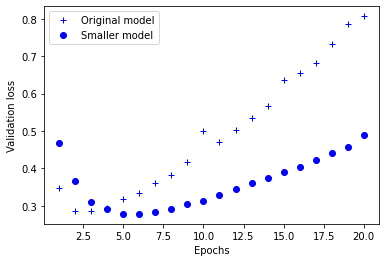

In [8]:

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 13s 502us/step - loss: 0.4605 - acc: 0.7968 - val_loss: 0.3625 - val_acc: 0.8434
Epoch 2/20
25000/25000 [==============================] - 11s 455us/step - loss: 0.2160 - acc: 0.9151 - val_loss: 0.3756 - val_acc: 0.8448
Epoch 3/20
25000/25000 [==============================] - 12s 469us/step - loss: 0.1252 - acc: 0.9540 - val_loss: 0.3310 - val_acc: 0.8839
Epoch 4/20
25000/25000 [==============================] - 11s 453us/step - loss: 0.0593 - acc: 0.9820 - val_loss: 0.7612 - val_acc: 0.8220
Epoch 5/20
25000/25000 [==============================] - 11s 457us/step - loss: 0.0614 - acc: 0.9825 - val_loss: 0.4639 - val_acc: 0.8542
Epoch 6/20
25000/25000 [==============================] - 12s 484us/step - loss: 0.0042 - acc: 0.9997 - val_loss: 0.6905 - val_acc: 0.8787
Epoch 7/20
25000/25000 [==============================] - 12s 476us/step - loss: 3.1060e-04 - acc: 1.0000 - val_loss

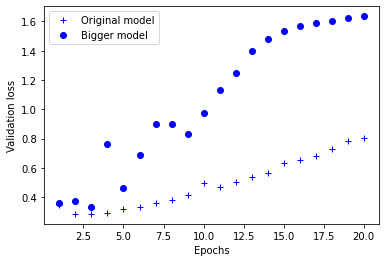

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

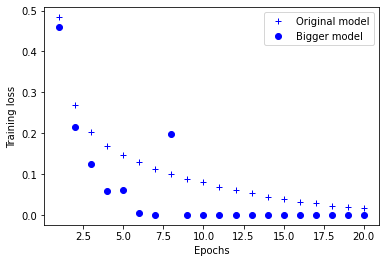

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.4989 - acc: 0.8216 - val_loss: 0.3898 - val_acc: 0.8731
Epoch 2/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.3184 - acc: 0.9041 - val_loss: 0.3510 - val_acc: 0.8779
Epoch 3/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.2735 - acc: 0.9182 - val_loss: 0.3300 - val_acc: 0.8888
Epoch 4/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2535 - acc: 0.9263 - val_loss: 0.3326 - val_acc: 0.8872
Epoch 5/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2413 - acc: 0.9321 - val_loss: 0.3430 - val_acc: 0.8827
Epoch 6/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.2342 - acc: 0.9343 - val_loss: 0.3459 - val_acc: 0.8825
Epoch 7/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2284 - acc: 0.9375 - val_loss: 0.3553 - val_ac

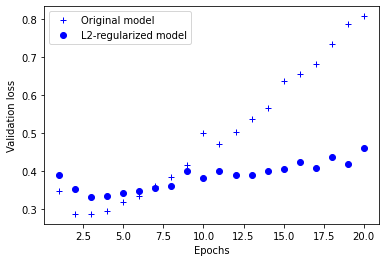

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [18]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.6155 - acc: 0.6557 - val_loss: 0.4881 - val_acc: 0.8549
Epoch 2/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.4804 - acc: 0.7986 - val_loss: 0.3715 - val_acc: 0.8816
Epoch 3/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.3891 - acc: 0.8541 - val_loss: 0.3170 - val_acc: 0.8848
Epoch 4/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.3282 - acc: 0.8834 - val_loss: 0.2839 - val_acc: 0.8902
Epoch 5/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.2863 - acc: 0.9015 - val_loss: 0.2778 - val_acc: 0.8909
Epoch 6/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.2578 - acc: 0.9130 - val_loss: 0.2804 - val_acc: 0.8896
Epoch 7/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2296 - acc: 0.9220 - val_loss: 0.2864 - val_ac

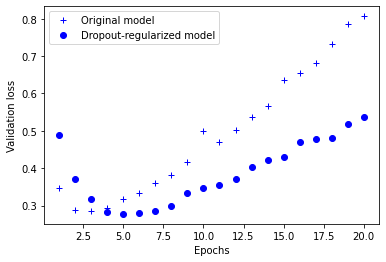

In [19]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()